In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
# import warnings
# warnings.filterwarings("ignore")

In [2]:
df=pd.read_excel("heart.xlsx")
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
a=df.columns

In [8]:
for i in a:
    print(df[i].value_counts())
    print("*"*100)

age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64
****************************************************************************************************
sex
1    207
0     96
Name: count, dtype: int64
****************************************************************************************************
cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64
****************************************************************************************************
trestbps
120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145   

<Axes: xlabel='target', ylabel='count'>

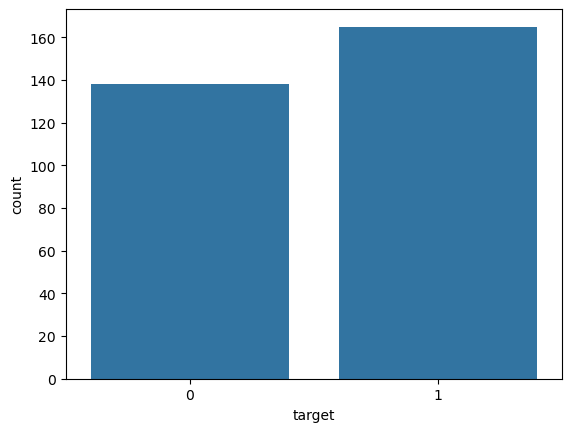

In [9]:
sns.countplot(x=df["target"])

In [10]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split

In [11]:
x=df.drop("target",axis=1)
y= df["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=11)

In [12]:
dt_clf = DecisionTreeClassifier(random_state=11)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=11)

In [13]:
dectree=DecisionTreeClassifier()

In [14]:
dectree_model=dectree.fit(x_train,y_train)

In [15]:
y_pred=dectree_model.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score

In [97]:
# Testing Data                                                #  Claasification
cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)
print("*"*60)

clf_report = classification_report(y_test,y_pred)
print("Classification Report:\n",clf_report)

Confusion Matrix -->
 [[19  5]
 [ 8 29]]
************************************************************
Accuracy: 0.7868852459016393
************************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.79      0.75        24
           1       0.85      0.78      0.82        37

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



In [99]:
# Traning accuracy
y_pred_train = dectree_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Classification Report:\n",cnf_matrix)
print("*"*100)

# multi_cnf_matrix = multilabel_confusion_matrix(y_train,y_pred_train)
# print("multilabe confusion matrixt:\n",multi_cnf_matrix)
# print("*"*100)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy:",accuracy)
print("*"*100)

clf_report = classification_report(y_train,y_pred_train)
print("Classification Report:\n",clf_report)

Classification Report:
 [[114   0]
 [  0 128]]
****************************************************************************************************
Accuracy: 1.0
****************************************************************************************************
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00       128

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



# Plot Deciosion Tree

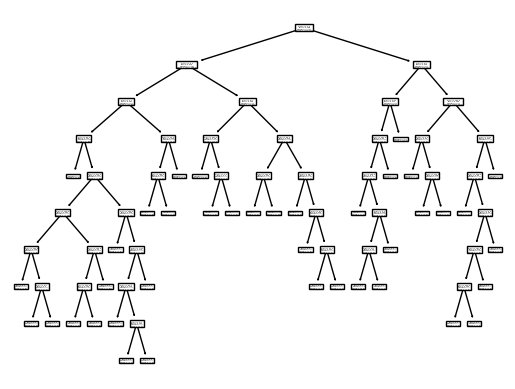

In [92]:
plot_tree(dectree_model)
print()

In [93]:
plt.figure(figsize=(200,150))
plot_tree(dt_clf, feature_names=x.columns, class_names=['0','1'], filled=True, rounded=True, precision=2)
print()
plt.savefig("Simple Decision Tree.png") 

In [60]:
from sklearn.model_selection import GridSearchCV
hyperparamter = {"criterion":["gini","entropy"],
                 "max_depth":np.arange(3,9),
                 "min_samples_split":np.arange(2,20),
                 "min_samples_leaf":np.arange(2,15)}

gscv_dt_clf = GridSearchCV(dectree_model,hyperparamter,cv=5)
gscv_dt_clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7, 8]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [61]:
gscv_dt_clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10)

In [75]:
array = dectree_model.feature_importances_
array

array([0.07232654, 0.02303393, 0.16365679, 0.01828742, 0.10627507,
       0.        , 0.        , 0.08972256, 0.01326754, 0.08391767,
       0.01179337, 0.11991082, 0.29780828])

<Axes: >

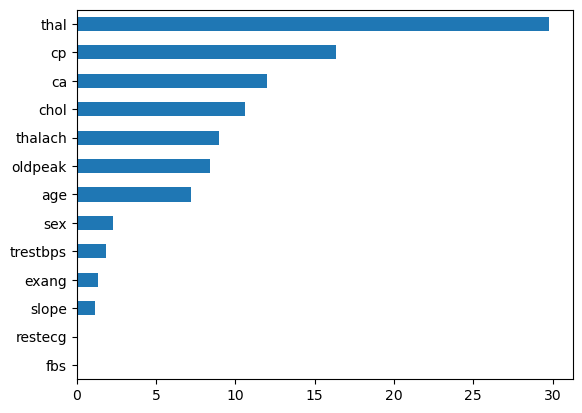

In [77]:
s1 = pd.Series(array * 100,index=x.columns)
s1.sort_values().plot(kind="barh")

# Cost Complexity Prunning

In [119]:
result = dectree_model.cost_complexity_pruning_path(x_train,y_train)
ccp_alpha_list = result["ccp_alphas"]
ccp_alpha_list

array([0.        , 0.00321396, 0.00385675, 0.00550964, 0.00550964,
       0.00550964, 0.00658996, 0.00661157, 0.00674931, 0.00734619,
       0.00743802, 0.00762285, 0.0077135 , 0.00777832, 0.00864826,
       0.01140955, 0.01269517, 0.01617938, 0.03530798, 0.04073691,
       0.04405227, 0.14840579])

In [127]:
train_accuracy_list=[]
test_accuracy_list= []

for i in ccp_alpha_list:
    dectree_model = DecisionTreeClassifier(ccp_alpha=i,random_state=11)
    dectree_model.fit(x_train,y_train)

    training_accuracy =  dectree_model.score(x_train,y_train)
    train_accuracy_list.append(training_accuracy)

    testing_accuracy = dectree_model.score(x_test,y_test)
    test_accuracy_list.append(testing_accuracy)

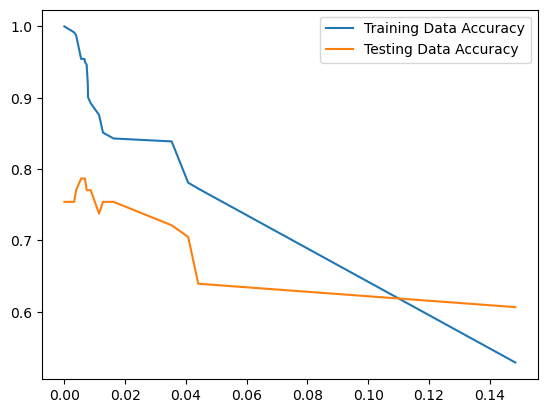

In [133]:
fig, ax = plt.subplots()
plt.plot(ccp_alpha_list,train_accuracy_list,label = "Training Data Accuracy")          # ccp :-  cost complex value 
ax.plot(ccp_alpha_list, test_accuracy_list, label = "Testing Data Accuracy")
ax.legend()

In [137]:
max_test = test_accuracy_list.index(max(test_accuracy_list))
max_test

3

In [143]:
best_ccp = ccp_alpha_list[max_test]
best_ccp

0.005509641873278236

In [233]:
dectree_model = DecisionTreeClassifier(ccp_alpha=0.05, random_state=10)

dectree_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.05, random_state=10)

In [235]:
# Testing Data                                                #  Claasification
cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix -->\n", cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)
print("*"*60)

clf_report = classification_report(y_test,y_pred)
print("Classification Report:\n",clf_report)

Confusion Matrix -->
 [[19  5]
 [ 8 29]]
************************************************************
Accuracy: 0.7868852459016393
************************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.79      0.75        24
           1       0.85      0.78      0.82        37

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



In [237]:
# Traning accuracy
y_pred_train = dectree_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Classification Report:\n",cnf_matrix)
print("*"*100)

# multi_cnf_matrix = multilabel_confusion_matrix(y_train,y_pred_train)
# print("multilabe confusion matrixt:\n",multi_cnf_matrix)
# print("*"*100)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy:",accuracy)
print("*"*100)

clf_report = classification_report(y_train,y_pred_train)
print("Classification Report:\n",clf_report)

Classification Report:
 [[ 78  36]
 [ 19 109]]
****************************************************************************************************
Accuracy: 0.7727272727272727
****************************************************************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.68      0.74       114
           1       0.75      0.85      0.80       128

    accuracy                           0.77       242
   macro avg       0.78      0.77      0.77       242
weighted avg       0.78      0.77      0.77       242

